# Beam Functions REMM

In [1]:
import math
import scipy
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def graphs(v_data, t_data, M_data, V_data, w_data):
    data_elements = {"Deflection": v_data, "Angle": t_data, "Moment": M_data, "Shear": V_data, "Load": w_data}

    for data_name, data in data_elements.items():
        plt.figure()
        for data_tuple in data:
            plt.plot(data_tuple[1], data_tuple[0], color="green")    
    
        plt.title(data_name)


In [3]:
def array_fill(v, theta, M, V, w, d_range):
    v_data_2 = [v(i) for i in d_range]
    t_data_2 = [theta(i) for i in d_range]
    M_data_2 = [M(i) for i in d_range]
    V_data_2 = [V(i) for i in d_range]
    w_data_2 = [w(i) for i in d_range]

    return [v_data_2, t_data_2, M_data_2, V_data_2, w_data_2]
    

## Cantilevered

In [5]:
def fix_support_and_single_load(x, L, E, I, P):
    v = lambda x: -P/(6*E*I)*(3*L*x**2-x**3)
    theta = lambda x: -P/(6*E*I)*(6*L*x-3*x**2)
    M = lambda x: -P/(6*E*I)*(6*L-6*x)*(E*I)
    V = lambda x: -P/(6*E*I)*(-6)*(E*I)
    w = lambda x: 0
    data_range = np.linspace(0, L, 50)
    v_data = [v(i) for i in data_range]
    t_data = [theta(i) for i in data_range]
    M_data = [M(i) for i in data_range]
    V_data = [V(i) for i in data_range]
    w_data = [w(i) for i in data_range]
    graphs([(v_data, data_range)], [(t_data, data_range)], [(M_data, data_range)], [(V_data, data_range)], [(w_data, data_range)])
    

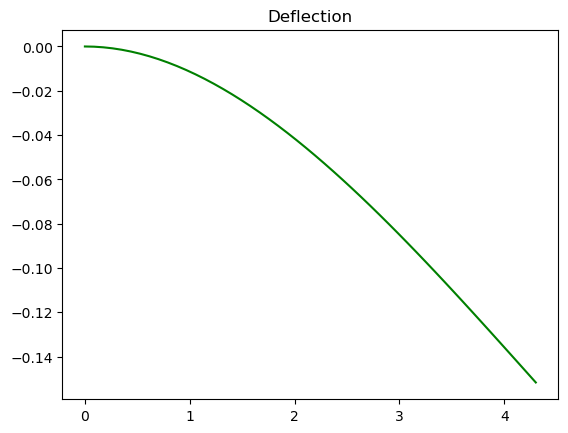

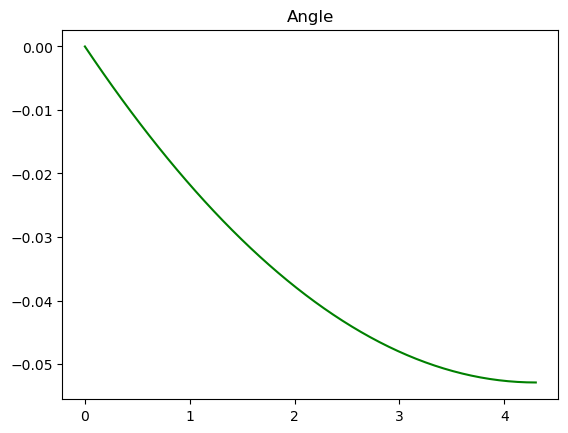

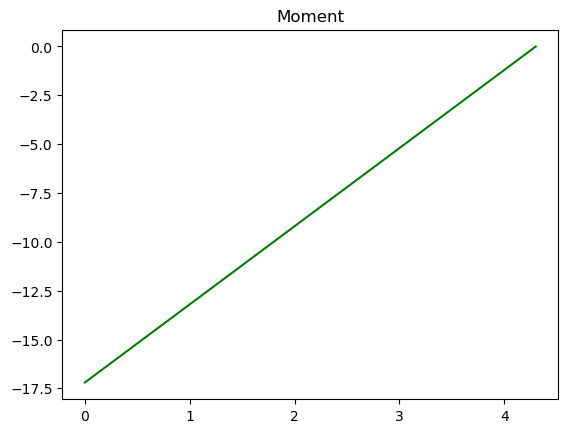

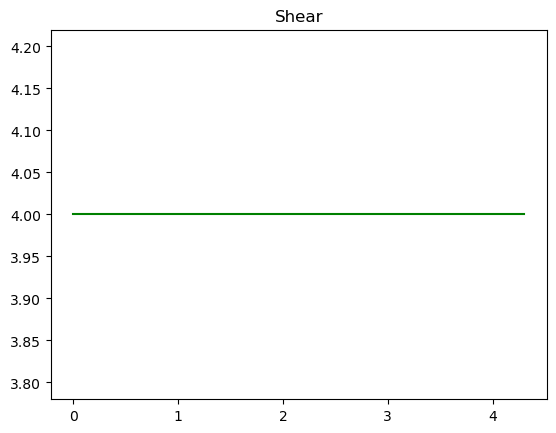

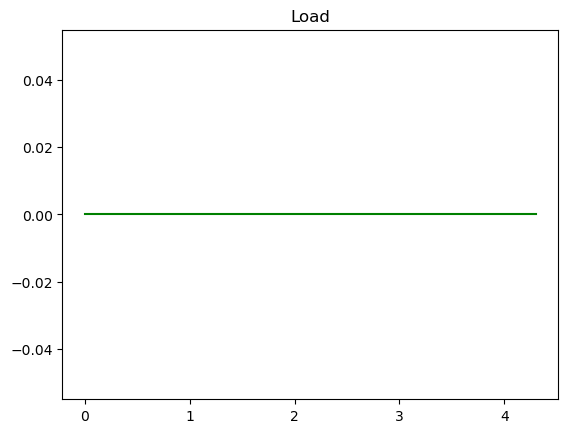

In [6]:
fix_support_and_single_load(2, 4.3, 233, 3, 4)

In [7]:
def fix_support_and_single_moment(x, L, E, I, M_0):
    v = lambda x: M_0/(2*E*I)*x**2
    theta = lambda x: M_0/(E*I)*x
    M = lambda x: M_0
    V = lambda x: 0
    w = lambda x: 0
    data_range = np.linspace(0, L, 50)
    v_data = [v(i) for i in data_range]
    t_data = [theta(i) for i in data_range]
    M_data = [M(i) for i in data_range]
    V_data = [V(i) for i in data_range]
    w_data = [w(i) for i in data_range]
    graphs([(v_data, data_range)], [(t_data, data_range)], [(M_data, data_range)], [(V_data, data_range)], [(w_data, data_range)])
    

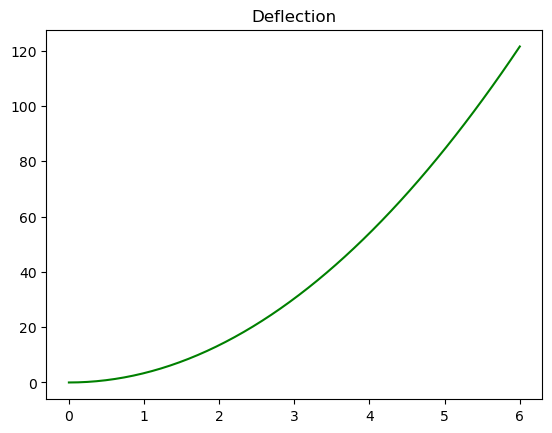

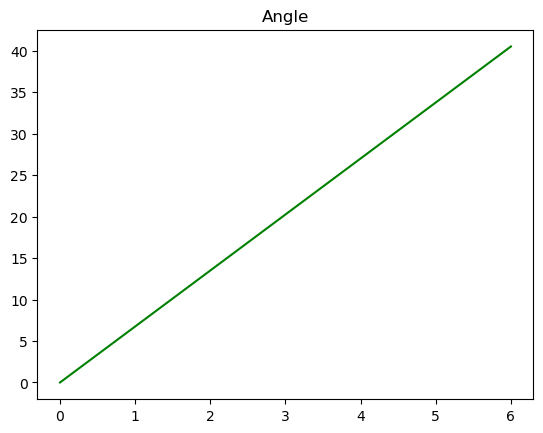

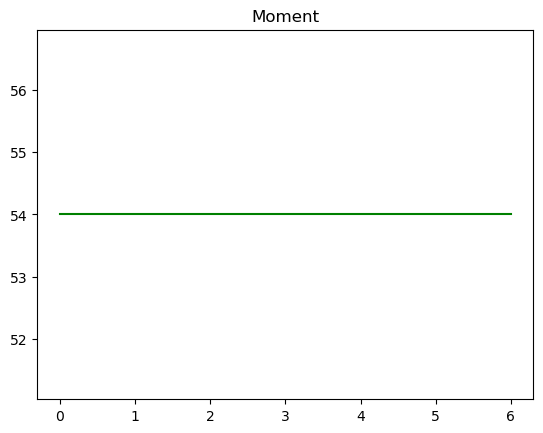

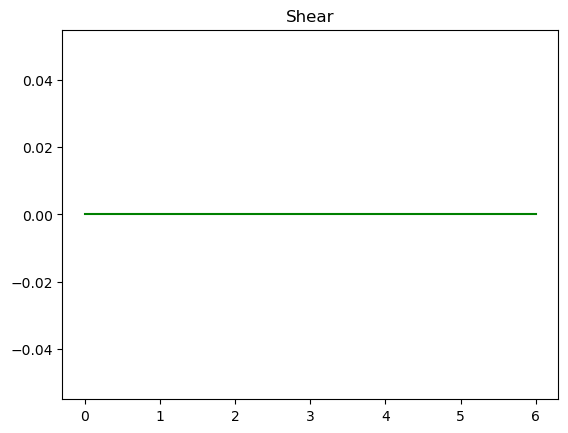

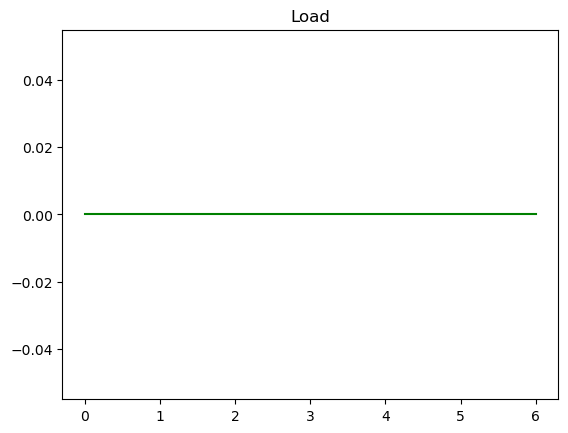

In [8]:
fix_support_and_single_moment(1, 6, 2, 4, 54)

In [9]:
def fix_support_and_dist_load(x, L, E, I, dl):
    v = lambda x: (-dl/(24*E*I)*(x**4-4*L*x**3+6*L**2*x**2))
    theta = lambda x: -dl/(24*E*I)*(4*x**3-12*L*x**2+12*L**2*x)
    M = lambda x: -dl/(24*E*I)*(12*x**2-24*L*x+12*L**2)*(E*I)
    V = lambda x: -dl/(24*E*I)*(24*x-24*L)*(E*I)
    w = lambda x: dl/(24*E*I)*(24)*(E*I)
    data_range = np.linspace(0, L, 50)
    v_data = [v(i) for i in data_range]
    t_data = [theta(i) for i in data_range]
    M_data = [M(i) for i in data_range]
    V_data = [V(i) for i in data_range]
    w_data = [w(i) for i in data_range]
    graphs([(v_data, data_range)], [(t_data, data_range)], [(M_data, data_range)], [(V_data, data_range)], [(w_data, data_range)])

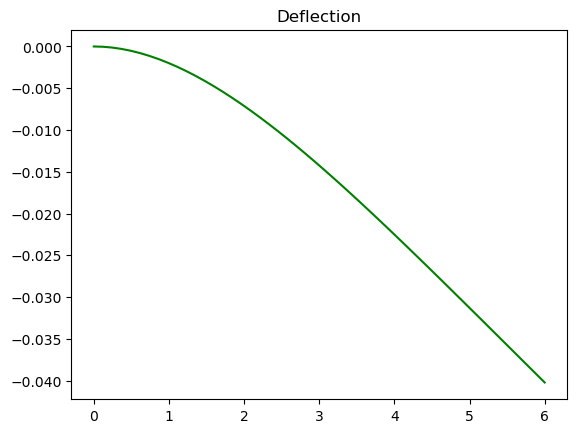

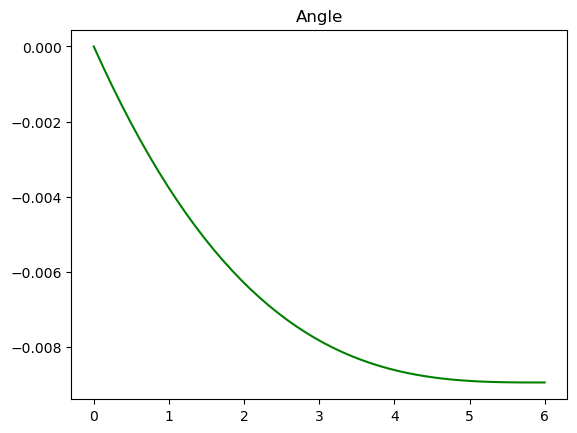

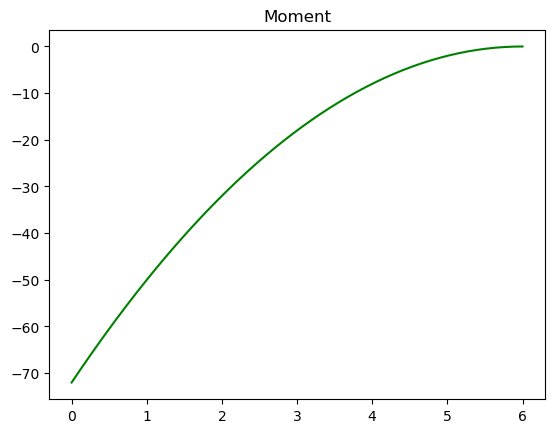

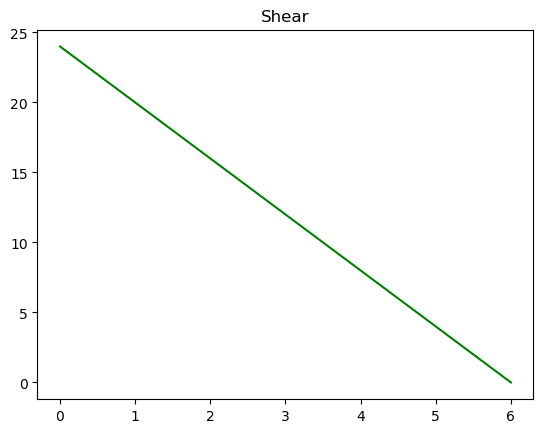

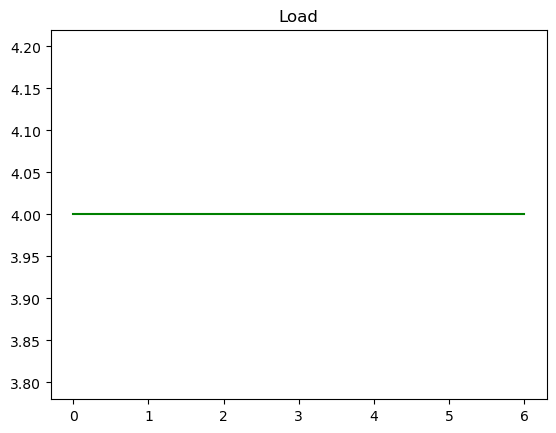

In [10]:
fix_support_and_dist_load(1, 6, 38, 424, 4)

In [11]:
def fix_support_and_single_displaced_load(x, L, E, I, P, a):
    # 0 <= X <=a
    v = lambda x: -P/(6*E*I)*(3*a*x**2-x**3)
    theta = lambda x: -P/(6*E*I)*(6*a*x-3*x**2)
    M = lambda x: -P/(6*E*I)*(6*a-6*x)*(E*I)
    V = lambda x: -P/(6*E*I)*(-6)*(E*I)
    w = lambda x: 0
    data_range_1 = np.linspace(0, a, 50)
    
    [v_data_1, t_data_1, M_data_1, V_data_1, w_data_1] = array_fill(v, theta, M, V, w, data_range_1)

    # a <= X <=L 
    v = lambda x: -P*a**2/(6*E*I)*(3*x - a)
    theta = lambda x: -P*a**2/(6*E*I)*(3)
    M = lambda x: 0
    V = lambda x: 0
    w = lambda x: 0
    data_range_2 = np.linspace(a, L, 50)

    [v_data_2, t_data_2, M_data_2, V_data_2, w_data_2] = array_fill(v, theta, M, V, w, data_range_2)

    graphs([(v_data_1, data_range_1), (v_data_2, data_range_2)], 
           [(t_data_1, data_range_1), (t_data_2, data_range_2)],
           [(M_data_1, data_range_1), (M_data_2, data_range_2)],
           [(V_data_1, data_range_1), (V_data_2, data_range_2)],
           [(w_data_1, data_range_1), (w_data_2, data_range_2)],)
    
 
    

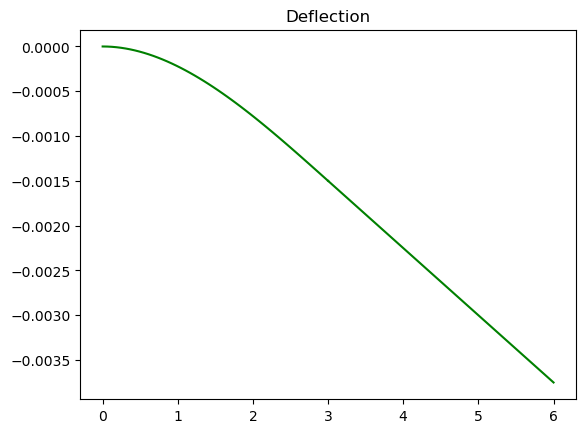

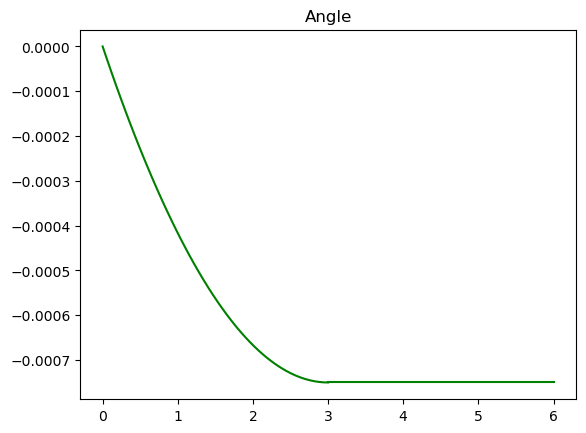

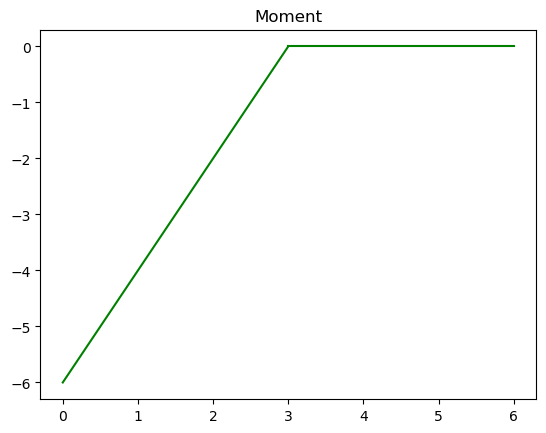

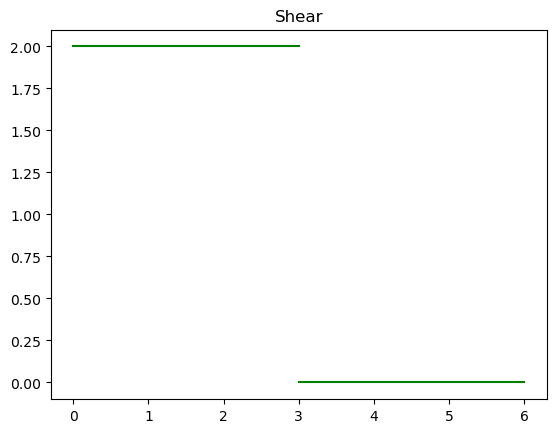

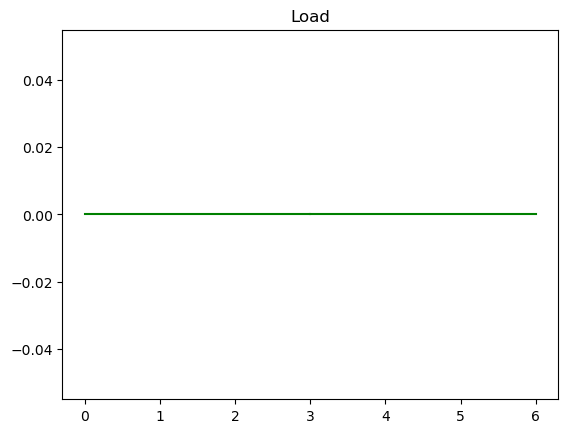

In [12]:
fix_support_and_single_displaced_load(1, 6, 30, 400, 2, 3)

In [13]:
def cantilever_triangular_dist_load(x, L, E, I, dl):
    v = lambda x: -dl*x**2/(120*L*E*I)*(10*L**3 - 10*L**2*x + 5*L*x**2 - x**3)
    theta = lambda x: -dl/(120*L*E*I)*(10*L**3*(2*x) - 10*L**2*(3*x**2) + 5*L*(4*x**3) - (5*x**4))
    M = lambda x: -dl/(120*L*E*I)*(10*L**3*(2) - 10*L**2*(3*2*x**1) + 5*L*(4*3*x**2) - (5*4*x**3))*(E*I)
    V = lambda x: -dl/(120*L*E*I)*(-10*L**2*(3*2) + 5*L*(4*3*2*x) - (5*4*3*x**2))*(E*I)
    w = lambda x: -dl/(120*L*E*I)*(5*L*(4*3*2) - (5*4*3*2*x))*(E*I)
    data_range = np.linspace(0, L, 50)
    
    [v_data, t_data, M_data, V_data, w_data] = array_fill(v, theta, M, V, w, data_range)
    graphs([(v_data, data_range)], [(t_data, data_range)], [(M_data, data_range)], [(V_data, data_range)], [(w_data, data_range)])

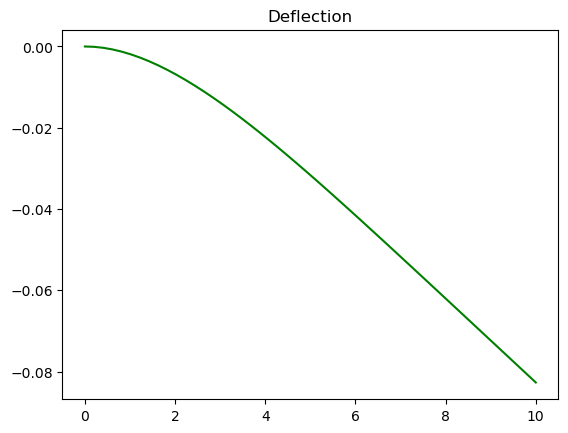

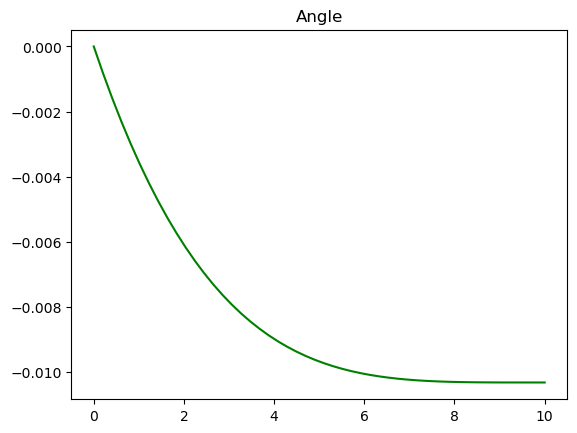

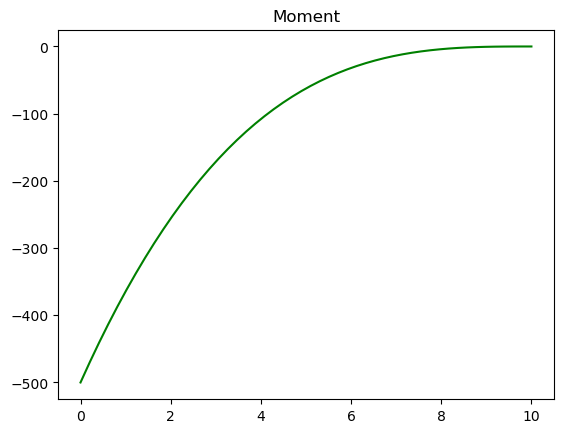

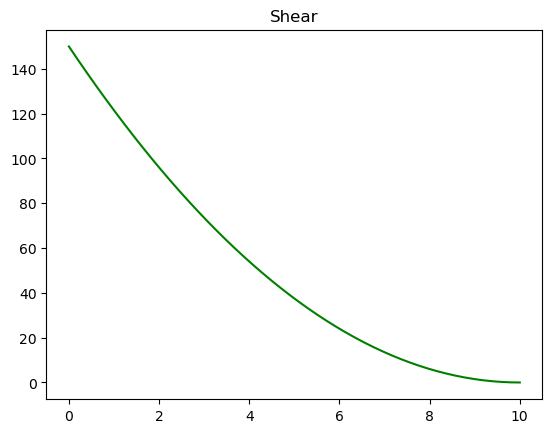

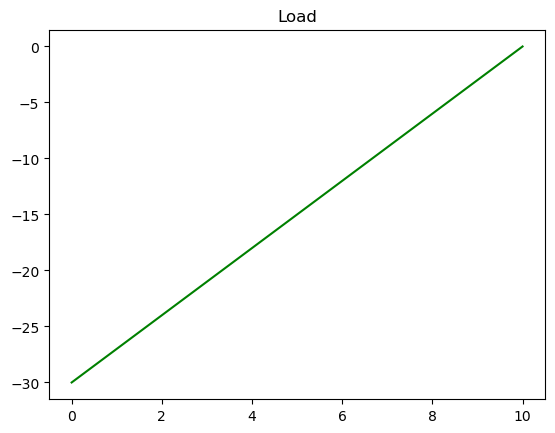

In [14]:
cantilever_triangular_dist_load(1, 10, 30, 4032, 30)

## Simply Supported

In [16]:
def simply_supported_intermediate_load(x, L, E, I, P, a, b):
    v = lambda x: -P*b*x/(6*L*E*I)*(L**2 - b**2 - x**2)
    theta = lambda x: -P*b/(6*L*E*I)*(L**2 - b**2 - 3*x**2)
    M = lambda x: -P*b/(6*L*E*I)*(-2*3*x)*E*I
    V = lambda x: -P*b/(6*L*E*I)*(-2*3)*E*I
    w = lambda x: 0
    data_range = np.linspace(0, a, 50)
    
    [v_data, t_data, M_data, V_data, w_data] = array_fill(v, theta, M, V, w, data_range)
    graphs([(v_data, data_range)], [(t_data, data_range)], [(M_data, data_range)], [(V_data, data_range)], [(w_data, data_range)])

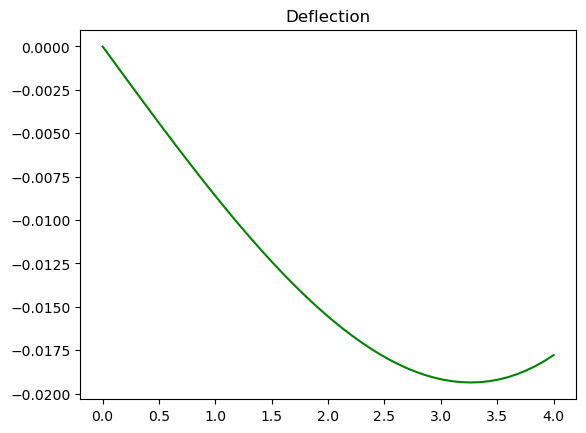

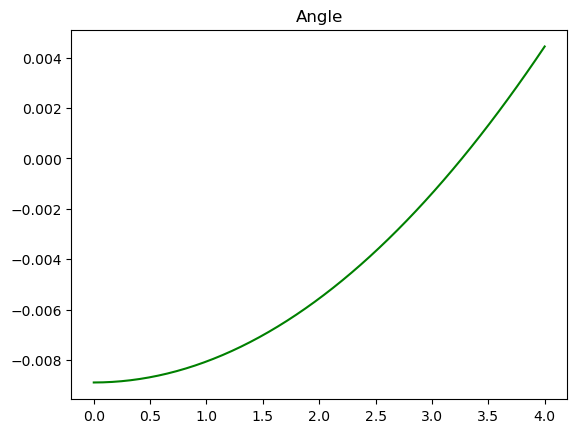

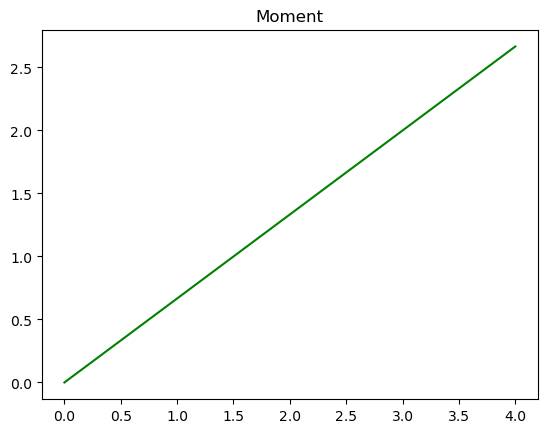

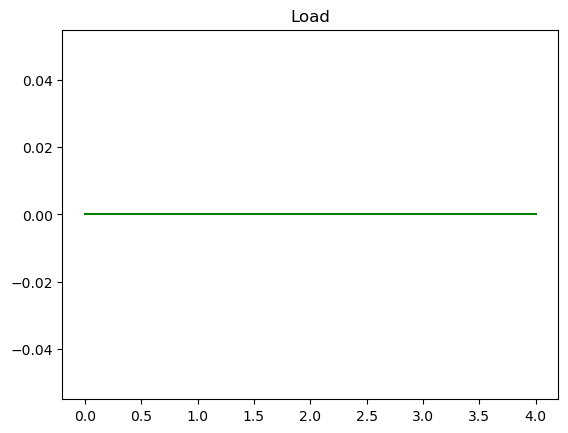

In [17]:
simply_supported_intermediate_load(1, 6, 10, 40, 2, 4, 2)

In [355]:
def simply_supported_end_moment(x, L, E, I, M_0, divisions):
    v = lambda x: -M_0*x/(6*E*I*L)*(L**2 - x**2)
    theta = lambda x: -M_0/(6*E*I*L)*(L**2 - 3*x**2)
    M = lambda x: -M_0/(6*E*I*L)*(-3*2*x)*(E*I)
    V = lambda x: -M_0/(6*E*I*L)*(-3*2)*(E*I)
    w = lambda x: 0
    data_range = np.linspace(0, L, divisions)
    
    [v_data, t_data, M_data, V_data, w_data] = array_fill(v, theta, M, V, w, data_range)
    graphs([(v_data, data_range)], [(t_data, data_range)], [(M_data, data_range)], [(V_data, data_range)], [(w_data, data_range)])
    return [v_data, t_data, M_data, V_data, w_data]

In [357]:
simply_supported_end_moment(2, 4, 49, 400, 30)

TypeError: simply_supported_end_moment() missing 1 required positional argument: 'divisions'

In [20]:
def simply_supported_dist_load(x, L, E, I, dl):
    v = lambda x: -dl*x/(24*E*I)*(x**3 - 2*L*x**2 + L**3)
    theta = lambda x: -dl/(24*E*I)*(4*x**3 - 2*L*3*x**2 + L**3)
    M = lambda x: -dl/(24*E*I)*(4*3*x**2 - 2*L*3*2*x)*(E*I)
    V = lambda x: -dl/(24*E*I)*(4*3*2*x - 2*L*3*2)*(E*I)
    w = lambda x: -dl/(24*E*I)*(4*3*2)*(E*I)
    data_range = np.linspace(0, L, 50)
    
    [v_data, t_data, M_data, V_data, w_data] = array_fill(v, theta, M, V, w, data_range)
    graphs([(v_data, data_range)], [(t_data, data_range)], [(M_data, data_range)], [(V_data, data_range)], [(w_data, data_range)])

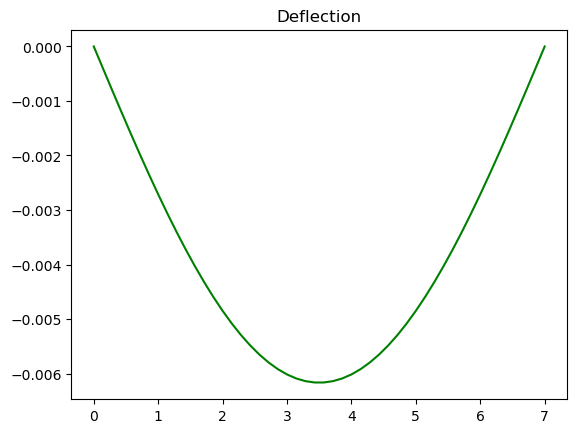

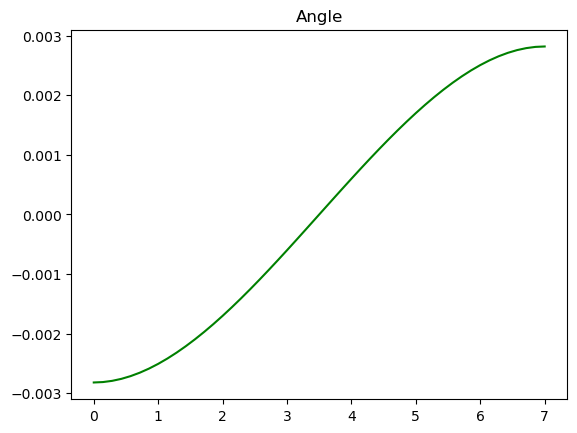

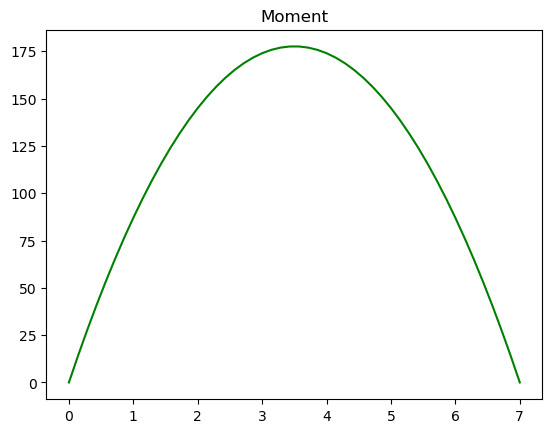

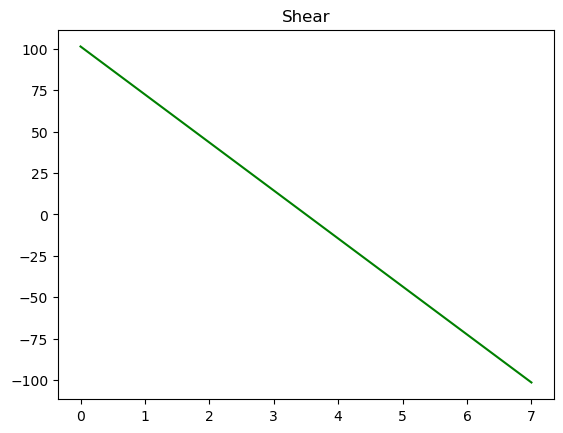

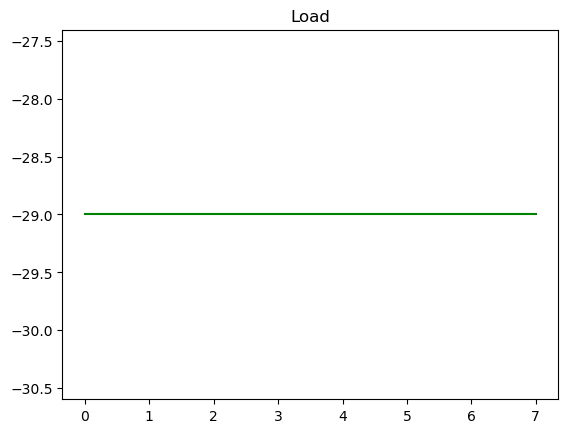

In [21]:
simply_supported_dist_load(1, 7, 49, 3000, 29)

In [147]:
def simply_supported_ramped_load(x, L, E, I, w_0, divisions):
    v = lambda x: -w_0*x/(360*E*I*L)*(3*x**4 - 10*L**2*x**2 + 7*L**4)
    theta = lambda x: -w_0/(360*E*I*L)*(3*5*x**4 - 10*L**2*3*x**2)
    M = lambda x: -w_0/(360*E*I*L)*(3*5*4*x**3 - 10*L**2*3*2*x)*(E*I)
    V = lambda x: -w_0/(360*E*I*L)*(3*5*4*3*x**2 - 10*L**2*3*2)*(E*I)
    w = lambda x: -w_0/(360*E*I*L)*(3*5*4*3*2*x)*(E*I)
    data_range = np.linspace(0, L, divisions)
    
    [v_data, t_data, M_data, V_data, w_data] = array_fill(v, theta, M, V, w, data_range)
    graphs([(v_data, data_range)], [(t_data, data_range)], [(M_data, data_range)], [(V_data, data_range)], [(w_data, data_range)])

    return [v_data, t_data, M_data, V_data, w_data]

[[-0.0,
  -0.0014872099466668673,
  -0.0029691107998633896,
  -0.004440406741618626,
  -0.005895828504960447,
  -0.007330146649414937,
  -0.008738184836505802,
  -0.010114833105253764,
  -0.011455061147675987,
  -0.012753931584285462,
  -0.014006613239590416,
  -0.015208394417593736,
  -0.016354696177292335,
  -0.01744108560817659,
  -0.018463289105729756,
  -0.01941720564692732,
  -0.02029892006573645,
  -0.021104716328615398,
  -0.021831090810012877,
  -0.022474765567867507,
  -0.023032701619107164,
  -0.023502112215148446,
  -0.023880476117396042,
  -0.024165550872742126,
  -0.024355386089065813,
  -0.024448336710732488,
  -0.02444307629409329,
  -0.024338610282984473,
  -0.024134289284226815,
  -0.023829822343125008,
  -0.02342529021896711,
  -0.02292115866052391,
  -0.022318291681548353,
  -0.021617964836274914,
  -0.02082187849491904,
  -0.019932171119176535,
  -0.018951432537722974,
  -0.017882717221713116,
  -0.016729557560280255,
  -0.015495977136035729,
  -0.01418650400056820

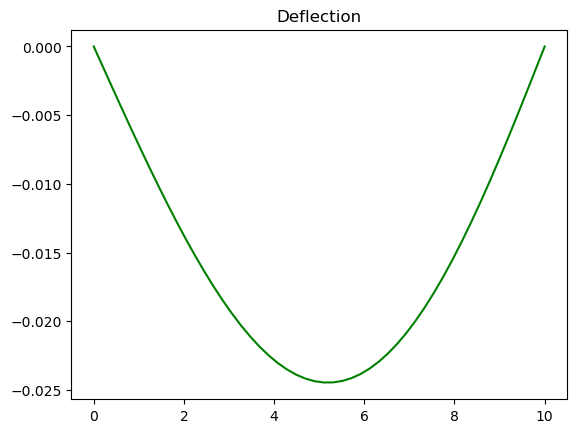

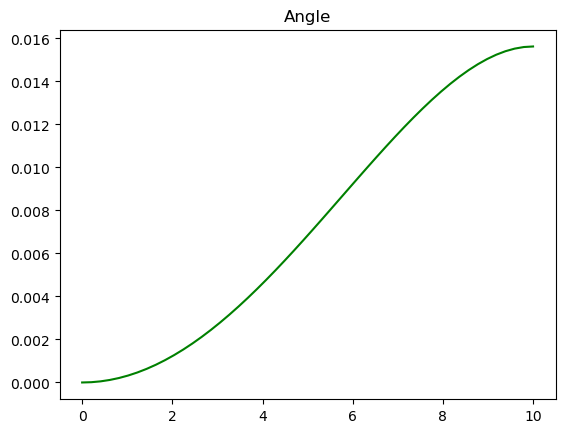

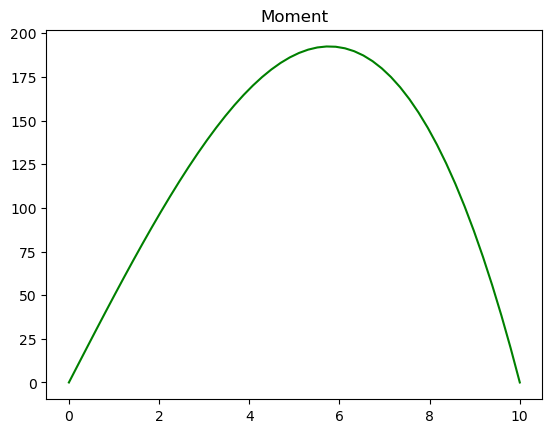

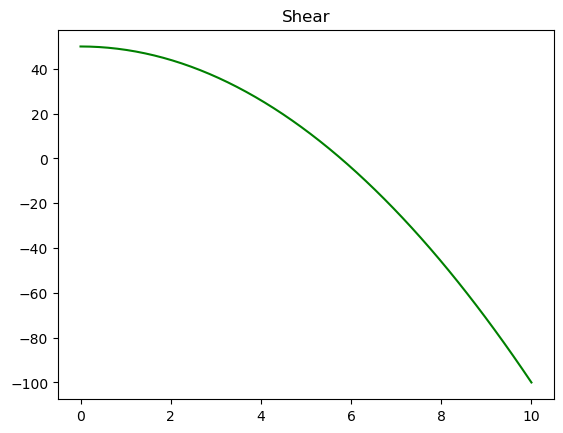

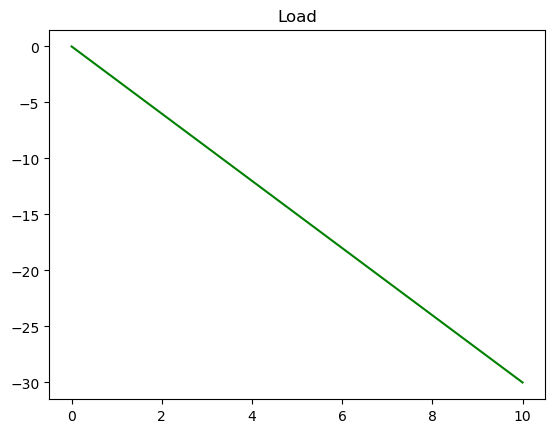

In [109]:
simply_supported_ramped_load(1, 10, 40, 2000, 30)

In [24]:
def main():
    print("Bienvenido, este programa realiza cálculos de Vigas")
    print("Opciones disponibles:")
    print("CANTILEVER")
    print("1) Cantilever con carga en el extremo")
    print("2) Cantilever con momento en el extremo")
    print("3) Cantilever con carga desplazada")
    print("4) Cantilever con carga distribuida uniforme")
    print("5) Cantilever con carga distribuida triangular")

    print("SIMPLEMENTE SOPORTADAS")
    print("6) Con carga puntual")
    print("7) Con momento en el extremo")
    print("8) Con carga distribuida uniforme")
    print("9) Con carga distribuida triangular")

    option = int(input("Qué Opción Quiere Ejecutar: "))

    E = float(input("Introducir el valor de E del material: "))
    I = float(input("Introducir el valor de I de la geometría de la viga: "))
    L = float(input("Introducir la longitud de la viga: "))

    
    if option == 1:
        P = float(input("Por favor, introducir el valor de la carga: "))
        fix_support_and_single_load(0, L, E, I, P)
    elif option == 2:
        M_0 = float(input("Por favor, introducir el valor del momento: "))
        fix_support_and_single_moment(0, L, E, I, M_0)
    elif option == 3:
        P = float(input("Por favor, introducir el valor de la carga: "))
        a = float(input("Por favor, introducir el valor del punto a: "))
        fix_support_and_single_displaced_load(0, L, E, I, P, a)
    elif option == 4:
        dl = float(input("Por favor, introducir el valor máximo de la carga distribuida: "))
        fix_support_and_dist_load(0, L, E, I, dl)
    elif option == 5:
        dl = float(input("Por favor, introducir el valor máximo de la carga distribuida: "))
        cantilever_triangular_dist_load(0, L, E, I, dl)
    elif option == 6:
        P = float(input("Por favor, introducir el valor de la carga: "))
        a = float(input("Por favor, introducir el valor del punto a: "))
        b = float(input("Por favor, introducir el valor del punto b: "))
        simply_supported_intermediate_load(0, L, E, I, P, a, b)
    elif option == 7:
        M_0 = float(input("Por favor, introducir el valor del momento: "))
        simply_supported_end_moment(0, L, E, I, M_0)
    elif option == 8:
        dl = float(input("Por favor, introducir el valor máximo de la carga distribuida: "))
        simply_supported_dist_load(0, L, E, I, dl)
    elif option == 9:
        w_0 = float(input("Por favor, introducir el valor máximo de la carga distribuida: "))
        simply_supported_ramped_load(0, L, E, I, w_0)

Bienvenido, este programa realiza cálculos de Vigas
Opciones disponibles:
CANTILEVER
1) Cantilever con carga en el extremo
2) Cantilever con momento en el extremo
3) Cantilever con carga desplazada
4) Cantilever con carga distribuida uniforme
5) Cantilever con carga distribuida triangular
SIMPLEMENTE SOPORTADAS
6) Con carga puntual
7) Con momento en el extremo
8) Con carga distribuida uniforme
9) Con carga distribuida triangular


Qué Opción Quiere Ejecutar:  3
Introducir el valor de E del material:  323
Introducir el valor de I de la geometría de la viga:  553
Introducir la longitud de la viga:  32323
Por favor, introducir el valor de la carga:  5343
Por favor, introducir el valor del punto a:  323553


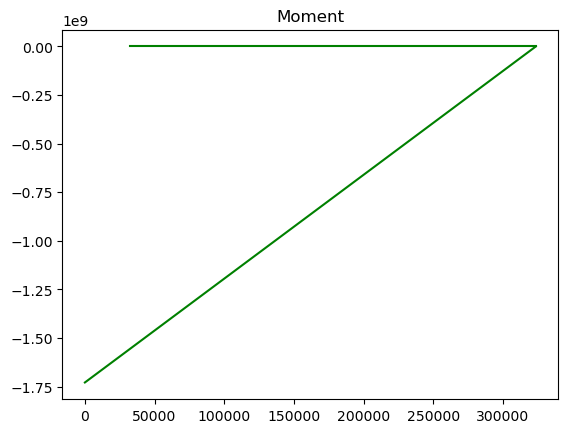

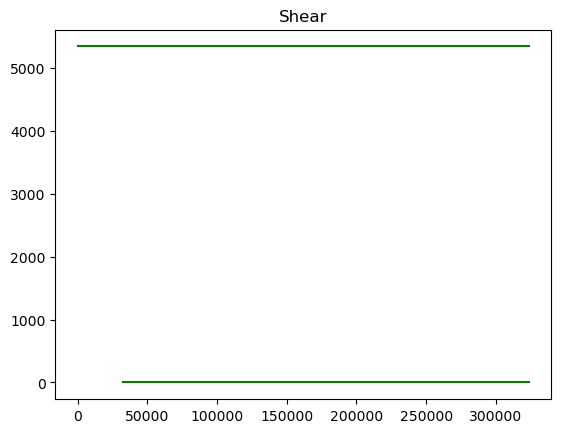

In [25]:
main()

In [393]:
def problema_taller(E, I):
    [v_data, t_data, M_data, V_data, w_data] = simply_supported_ramped_load(0, 6, E, I, 6, 50)
    [v_data_2, t_data_2, M_data_2, V_data_2, w_data_2] = (simply_supported_ramped_load(0, 3, E, I, -3, 25))
    [v_data_3, t_data_3, M_data_3, V_data_3, w_data_3] = simply_supported_end_moment(0, 3, E, I, -1.5, 25)
    
        
        
    v_data_2 = np.concatenate((v_data_2, np.array([0 for i in range(0, 25)])))
    v_data_3 = np.concatenate((v_data_3, np.array([0 for i in range(0, 25)])))
    
    t_data_2 = np.concatenate((t_data_2, np.array([0 for i in range(0, 25)])))
    t_data_3 = np.concatenate((t_data_3, np.array([0 for i in range(0, 25)])))

    M_data_2 = np.concatenate((M_data_2, np.array([0 for i in range(0, 25)])))
    M_data_3 = np.concatenate((M_data_3, np.array([0 for i in range(0, 25)])))

    V_data_2 = np.concatenate((V_data_2, np.array([0 for i in range(0, 25)])))
    V_data_3 = np.concatenate((V_data_3, np.array([0 for i in range(0, 25)])))

    w_data_2 = np.concatenate((w_data_2, np.array([0 for i in range(0, 25)])))
    w_data_3 = np.concatenate((w_data_3, np.array([0 for i in range(0, 25)])))
    
    #w_data_2 =  np.where(np.array(w_data_2) > 3, 0, np.array(w_data_2))

    print(M_data_3)    
    v = np.array(v_data) + np.array(v_data_2) + np.array(v_data_3)
    t = np.array(t_data) + np.array(t_data_2) + np.array(t_data_3)
    M = np.array(M_data) + np.array(M_data_2) + np.array(M_data_3)
    V = np.array(V_data) + np.array(V_data_2) + np.array(V_data_3)
    w = np.array(w_data) + np.array(w_data_2) + np.array(w_data_3)

    
    print(w)
    return [v, t, M, V, w]

    

In [395]:
np.array([1, 2]) + np.array([1, 2])

array([2, 4])

[-0.     -0.0625 -0.125  -0.1875 -0.25   -0.3125 -0.375  -0.4375 -0.5
 -0.5625 -0.625  -0.6875 -0.75   -0.8125 -0.875  -0.9375 -1.     -1.0625
 -1.125  -1.1875 -1.25   -1.3125 -1.375  -1.4375 -1.5     0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.    ]
[ 0.00000000e+00  2.55102041e-03  5.10204082e-03  7.65306122e-03
  1.02040816e-02  1.27551020e-02  1.53061224e-02  1.78571429e-02
  2.04081633e-02  2.29591837e-02  2.55102041e-02  2.80612245e-02
  3.06122449e-02  3.31632653e-02  3.57142857e-02  3.82653061e-02
  4.08163265e-02  4.33673469e-02  4.59183673e-02  4.84693878e-02
  5.10204082e-02  5.35714286e-02  5.61224490e-02  5.86734694e-02
  6.12244898e-02 -3.06122449e+00 -3.18367347e+00 -3.30612245e+00
 -3.42857143e+00 -3.55102041e+00 -3.67346939e+00 -3.79591837e+00
 -3.91836735e+00 -4.04081633e+00 -4.16326531e+00 -4.28571429e+00
 -4.40816327e+00 -4.530

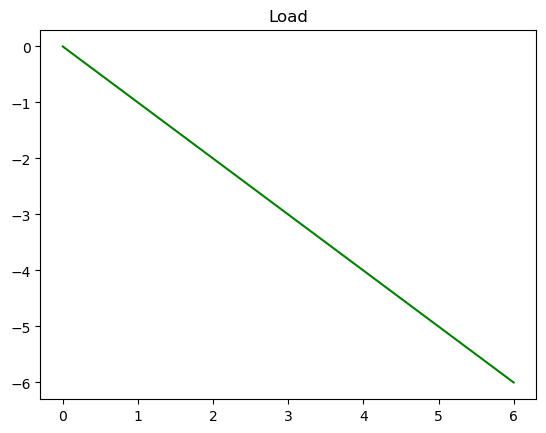

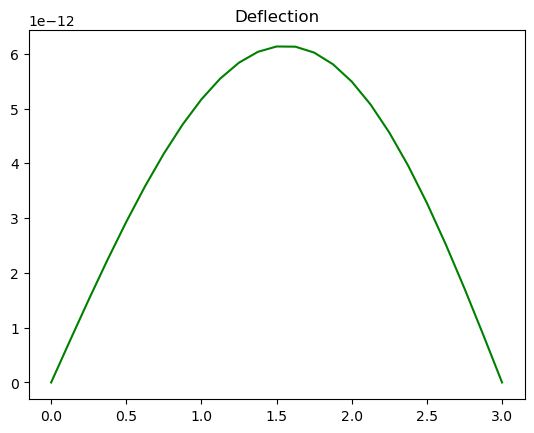

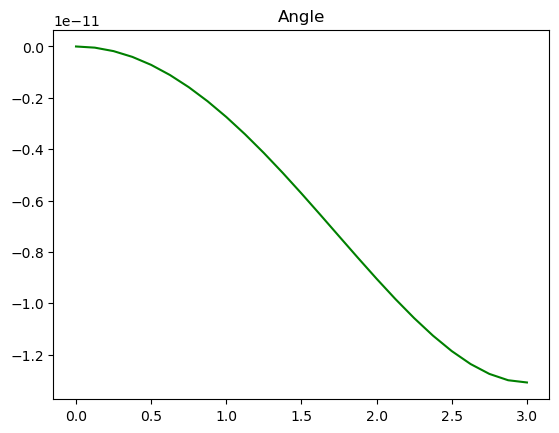

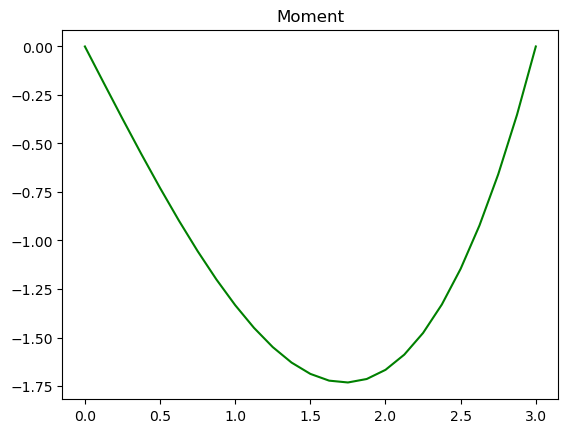

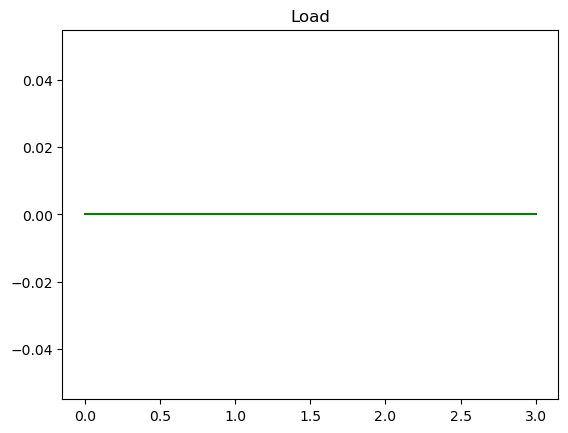

In [397]:
data_range = data_range = np.linspace(0, 6, 50)
[v_data, t_data, M_data, V_data, w_data] = problema_taller(200, 1290*10**6)


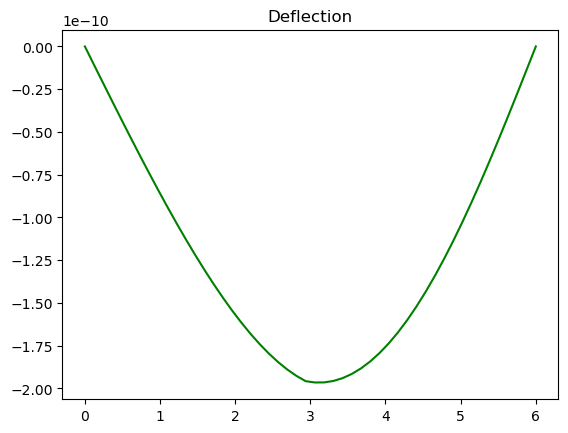

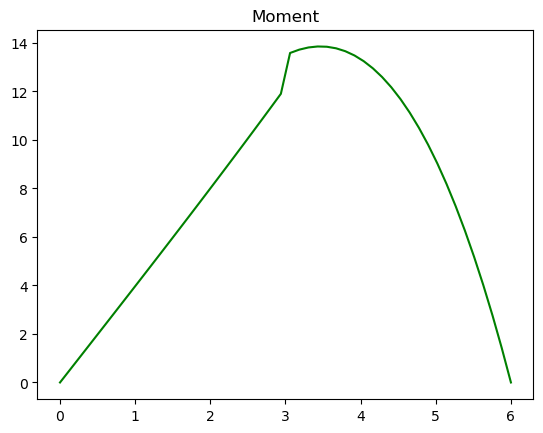

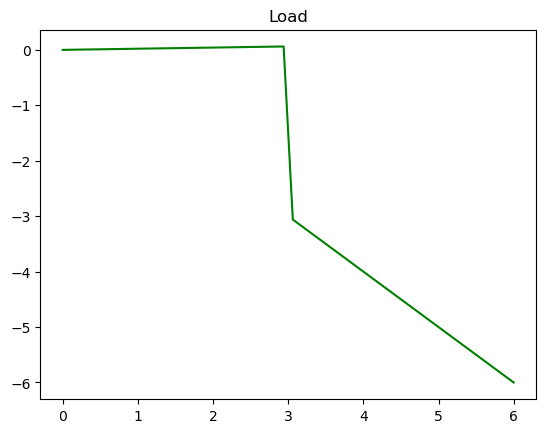

In [399]:
graphs([(v_data, data_range)], [(t_data, data_range)], [(M_data, data_range)], [(V_data, data_range)], [(w_data, data_range)])

In [401]:
v_min = np.min(v_data)

In [403]:
print(v_min)

-1.9649639923788716e-10


In [405]:
len(v_data)

50

In [407]:
index_min = np.where(v_data == v_min)

In [409]:
pos = (6/50)*(index_min[0])

In [411]:
pos[0]

3.0

In [413]:
w_data

array([ 0.00000000e+00,  2.55102041e-03,  5.10204082e-03,  7.65306122e-03,
        1.02040816e-02,  1.27551020e-02,  1.53061224e-02,  1.78571429e-02,
        2.04081633e-02,  2.29591837e-02,  2.55102041e-02,  2.80612245e-02,
        3.06122449e-02,  3.31632653e-02,  3.57142857e-02,  3.82653061e-02,
        4.08163265e-02,  4.33673469e-02,  4.59183673e-02,  4.84693878e-02,
        5.10204082e-02,  5.35714286e-02,  5.61224490e-02,  5.86734694e-02,
        6.12244898e-02, -3.06122449e+00, -3.18367347e+00, -3.30612245e+00,
       -3.42857143e+00, -3.55102041e+00, -3.67346939e+00, -3.79591837e+00,
       -3.91836735e+00, -4.04081633e+00, -4.16326531e+00, -4.28571429e+00,
       -4.40816327e+00, -4.53061224e+00, -4.65306122e+00, -4.77551020e+00,
       -4.89795918e+00, -5.02040816e+00, -5.14285714e+00, -5.26530612e+00,
       -5.38775510e+00, -5.51020408e+00, -5.63265306e+00, -5.75510204e+00,
       -5.87755102e+00, -6.00000000e+00])

In [417]:
print(w_data)

[ 0.00000000e+00  2.55102041e-03  5.10204082e-03  7.65306122e-03
  1.02040816e-02  1.27551020e-02  1.53061224e-02  1.78571429e-02
  2.04081633e-02  2.29591837e-02  2.55102041e-02  2.80612245e-02
  3.06122449e-02  3.31632653e-02  3.57142857e-02  3.82653061e-02
  4.08163265e-02  4.33673469e-02  4.59183673e-02  4.84693878e-02
  5.10204082e-02  5.35714286e-02  5.61224490e-02  5.86734694e-02
  6.12244898e-02 -3.06122449e+00 -3.18367347e+00 -3.30612245e+00
 -3.42857143e+00 -3.55102041e+00 -3.67346939e+00 -3.79591837e+00
 -3.91836735e+00 -4.04081633e+00 -4.16326531e+00 -4.28571429e+00
 -4.40816327e+00 -4.53061224e+00 -4.65306122e+00 -4.77551020e+00
 -4.89795918e+00 -5.02040816e+00 -5.14285714e+00 -5.26530612e+00
 -5.38775510e+00 -5.51020408e+00 -5.63265306e+00 -5.75510204e+00
 -5.87755102e+00 -6.00000000e+00]
